In [64]:
#Crop Yield Prediction

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\nirma\\Downloads\\yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop("Unnamed: 0",axis=1,inplace =True)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape

(28242, 7)

In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

C:\Users\nirma\AppData\Local\Temp\ipykernel_30184\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [13]:
# Transforming average_rain_fall_mm_per_year

In [14]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [15]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [16]:
to_drop=df[df["average_rain_fall_mm_per_year"].apply(isStr)].index

In [17]:
df=df.drop(to_drop)

In [18]:
df["average_rain_fall_mm_per_year"]=df["average_rain_fall_mm_per_year"].astype(np.float64)

In [19]:
# Graph frequency VS Area

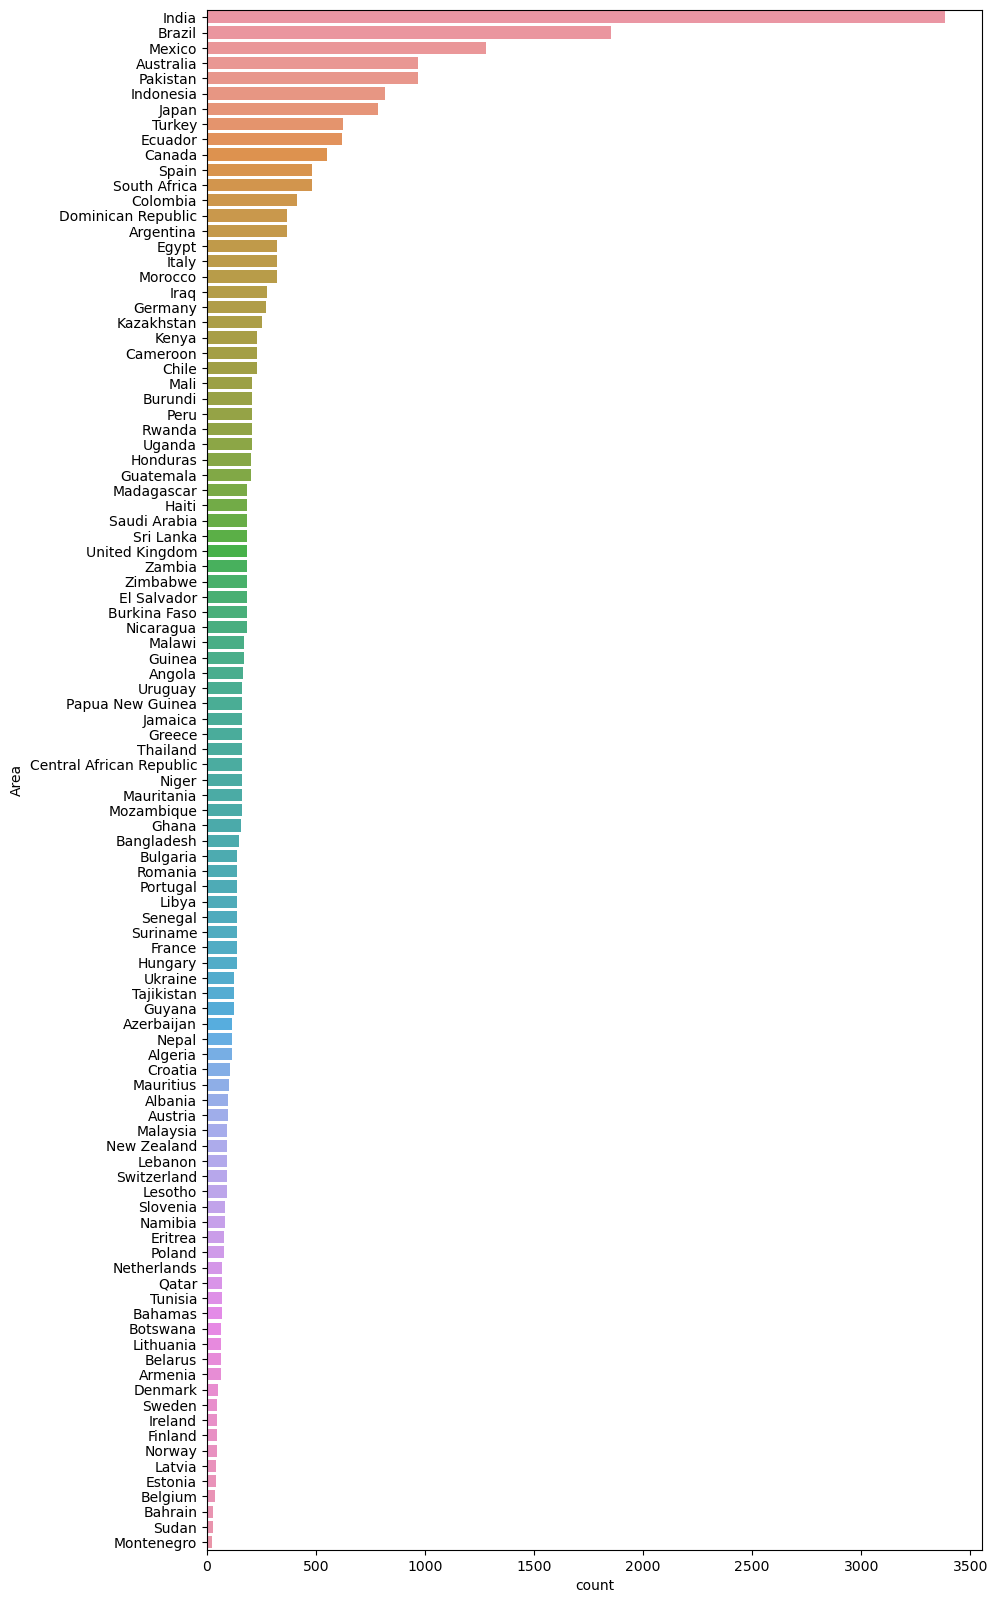

In [20]:
fig=plt.figure(figsize=(10,20))
sns.countplot(y=df["Area"],order=df["Area"].value_counts().index)
plt.show()

In [21]:
# Yield_per_country

In [22]:
country=df["Area"].unique()

In [23]:
Yield_per_country=[]
for state in country:
    Yield_per_country.append(df[df["Area"]==state]['hg/ha_yield'].sum())

In [24]:
Yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [25]:
# Yield per country graph

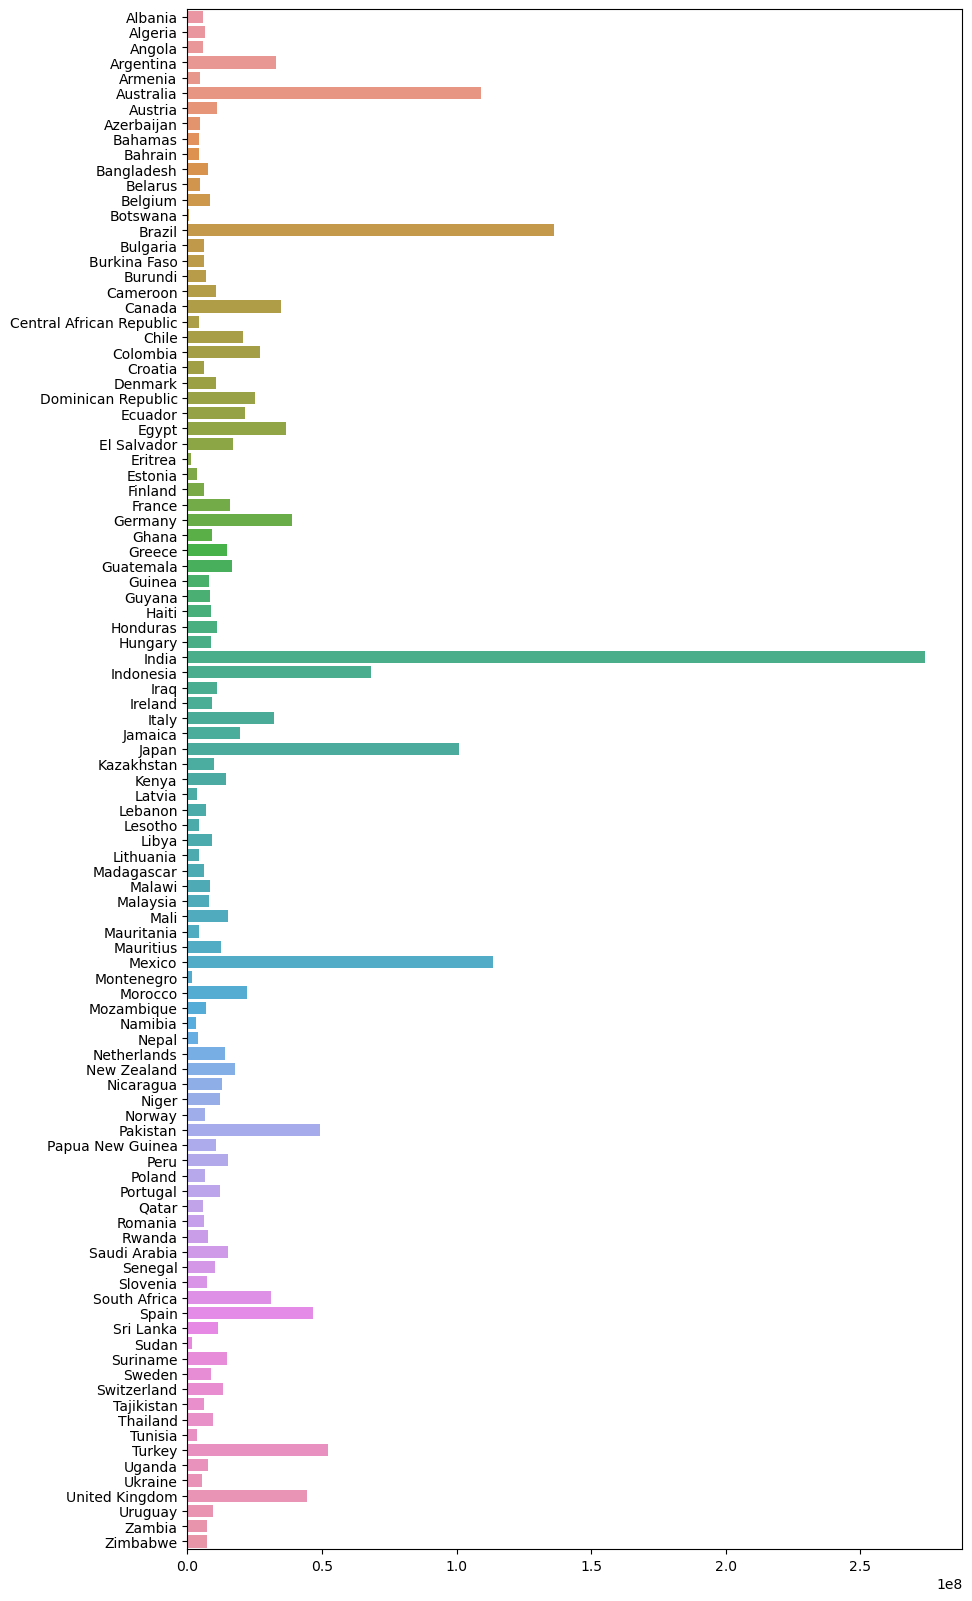

In [26]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=Yield_per_country)
plt.show()

<Axes: xlabel='count', ylabel='Item'>

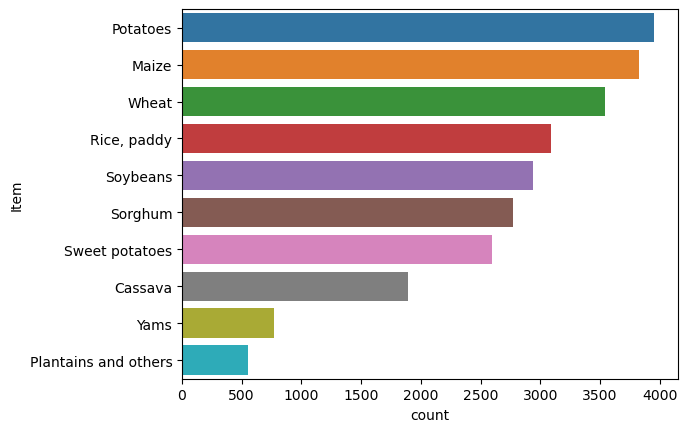

In [27]:
sns.countplot(y=df["Item"],order=df["Item"].value_counts().index)

In [28]:
# Yield VS Item
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [29]:
crops=df["Item"].unique()

In [30]:
Yield_per_item=[]
for crop in crops:
    Yield_per_item.append(df[df["Item"]==crop]["hg/ha_yield"].sum())

In [31]:
Yield_per_item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

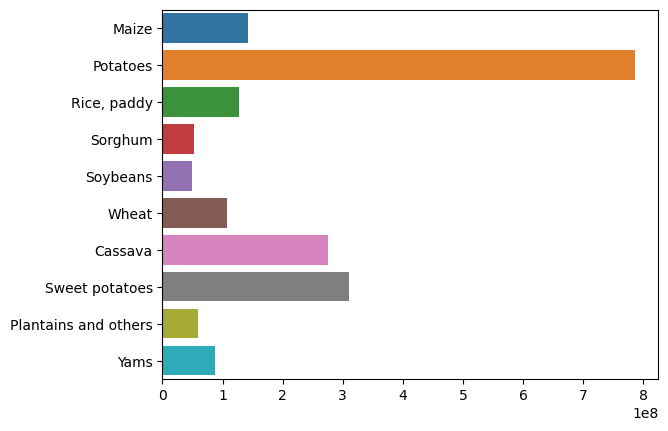

In [32]:
sns.barplot(y=crops,x=Yield_per_item)

In [33]:
# Train Test Split

In [34]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [35]:
df=df[['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']]

In [36]:
df.head(2)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667


In [37]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(20745, 6)

In [40]:
 X_test.shape

(5187, 6)

In [41]:
# converting categorical to numerical and scaling the values

In [42]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [43]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

In [44]:
X_train.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum


In [45]:
preprocessor = ColumnTransformer(
transformers=[
    ("onehotencoder",ohe,[4,5]),
    ("standardization",scaler,[0,1,2,3])
],
remainder="passthrough"
)

In [46]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [47]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.fit_transform(X_test)

In [48]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [50]:
models = {
    'lr': LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}

for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred=mod.predict(X_test_dummy)
    
    print(f"{name} MAE: {mean_absolute_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")


lr MAE: 29907.670409867016 Score 0.748648221288814


C:\Users\nirma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.82422, tolerance: 14819338848.544123
  model = cd_fast.sparse_enet_coordinate_descent(


lss MAE: 29893.287024092002 Score 0.7485678817523188
rg MAE: 29861.308471827706 Score 0.7485296428459347
knr MAE: 4840.155080007711 Score 0.9830831676075695
dtr MAE: 8272.403315982263 Score 0.934773107458875


In [51]:
# Select model

In [52]:
# DecisionTreeRegressor

In [53]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
y_pred=dtr.predict(X_test_dummy)

In [54]:
y_pred

array([ 34473.,  15838.,  72614., ...,  52692.,   9621., 279000.])

In [55]:
# Prediction System

In [56]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features= np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])
    
    transformed_features=preprocessor.transform(features)
    predicted_value=dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [57]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp=26.55
Area="Saudi Arabia"
Item="Sorghum"

result=prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
print(result)

[11513.]


C:\Users\nirma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
# KNeighborsRegressor

In [59]:
knr=KNeighborsRegressor()
knr.fit(X_train_dummy,y_train)
y_pred=knr.predict(X_test_dummy)

In [60]:
y_pred

array([126586.2,  15554. ,  72138.2, ...,  50899. ,   9621. , 139136.4])

In [61]:
# Prediction System

In [62]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features= np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])
    
    transformed_features=preprocessor.transform(features)
    predicted_value=knr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [63]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp=26.55
Area="Saudi Arabia"
Item="Sorghum"

result=prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
print(result)

[12529.]


C:\Users\nirma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
